In [1]:
# first let's get the data import/cleanup out of the way
import pandas as pd
import json
import os
os.environ["PATH"] += os.pathsep + r"C:\\Program Files\\Graphviz\bin"

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import dtreeviz

In [2]:
columns = [
    "is_advanced",
    "is_melee",
    "average_damage",
    "hands_to_use",
    "bulk",
    "cost",
    "number_of_traits",
]
df = pd.DataFrame(columns = columns)

directory = os.fsencode("equipment")

i = 0

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    with open(f"equipment\\{filename}", 'r') as f:
        try:
            data = json.load(f)
        except UnicodeDecodeError:
            continue
    
    try:
        name = data['name']
        if data['type'] != 'weapon':
            continue

        if name.lower().replace(' ', '-') != data['system']['baseItem']:
            continue

        if 'magical' in data['system']['traits']['value']:
            continue
        # okay we weeded out what we don't need, everything else is the base items

        data = data['system']  # as everything is in here honestly
        # now let's put it in the dataframe
        line = []  # "is_advanced", "is_melee", "average_damage", "hands_to_use", "bulk", "cost", "number_of_traits"

        # is_advanced
        if data['category'] == 'advanced':
            line.append(1)
        else:
            line.append(0)

        # is_melee
        if data['group'] in ['bomb', 'bow', 'crossbow', 'dart', 'firearm', 'sling']:
            line.append(0)
        else:
            line.append(1)
        
        # average_damage
        die_amount = data['damage']['dice']
        if data['damage']['die']:
            die_size = int(data['damage']['die'][1:])
        else:
            die_size = 0
        average_damage = die_amount * (die_size / 2 + 0.5)
        line.append(average_damage)

        # hands_to_use
        if 'two-hand' in data['usage']['value']:
            line.append(2)
        else:
            line.append(1)

        # bulk
        if data['bulk']['value'] == 0.1:
            line.append(0)
        else:
            line.append(data['bulk']['value'])

        # cost
        price = data['price']['value']
        cost = price.get('pp', 0) * 10 + price.get('gp', 0) + price.get('sp', 0) * 0.1 + price.get('cp', 0) * 0.01
        line.append(cost)

        # number of traits
        line.append(len(data['traits']['value']))

        df.loc[i] = line
        i += 1
    except Exception as e:
        print(name)
        raise(e)

df2 = df
df = df[df['cost'] != 90]
df['is_advanced'] = df['is_advanced'].map(int)
df

C:\Users\Felhasznalo\AppData\Local\Temp\ipykernel_7284\4126008231.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,is_advanced,is_melee,average_damage,hands_to_use,bulk,cost,number_of_traits
0,0,1.0,5.5,2.0,2.0,1.0,3.0
1,0,0.0,2.5,1.0,0.0,4.0,2.0
2,1,1.0,3.5,1.0,1.0,5.0,4.0
3,0,0.0,4.5,2.0,1.0,25.0,1.0
4,1,1.0,4.5,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
261,0,1.0,2.5,1.0,0.0,2.0,6.0
262,1,0.0,3.5,2.0,2.0,8.0,4.0
263,0,0.0,2.5,1.0,1.0,3.0,3.0
264,0,1.0,3.5,1.0,0.0,1.0,4.0


In [3]:
X = df[[
    "is_melee",
    "average_damage",
    "hands_to_use",
    "bulk",
    "cost",
    "number_of_traits",
]]
y = df['is_advanced']

# Fit the decision tree classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

c:\Users\Felhasznalo\OneDrive - lucit\2025_1 classes\intro_to_machine_learning\exercises\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring

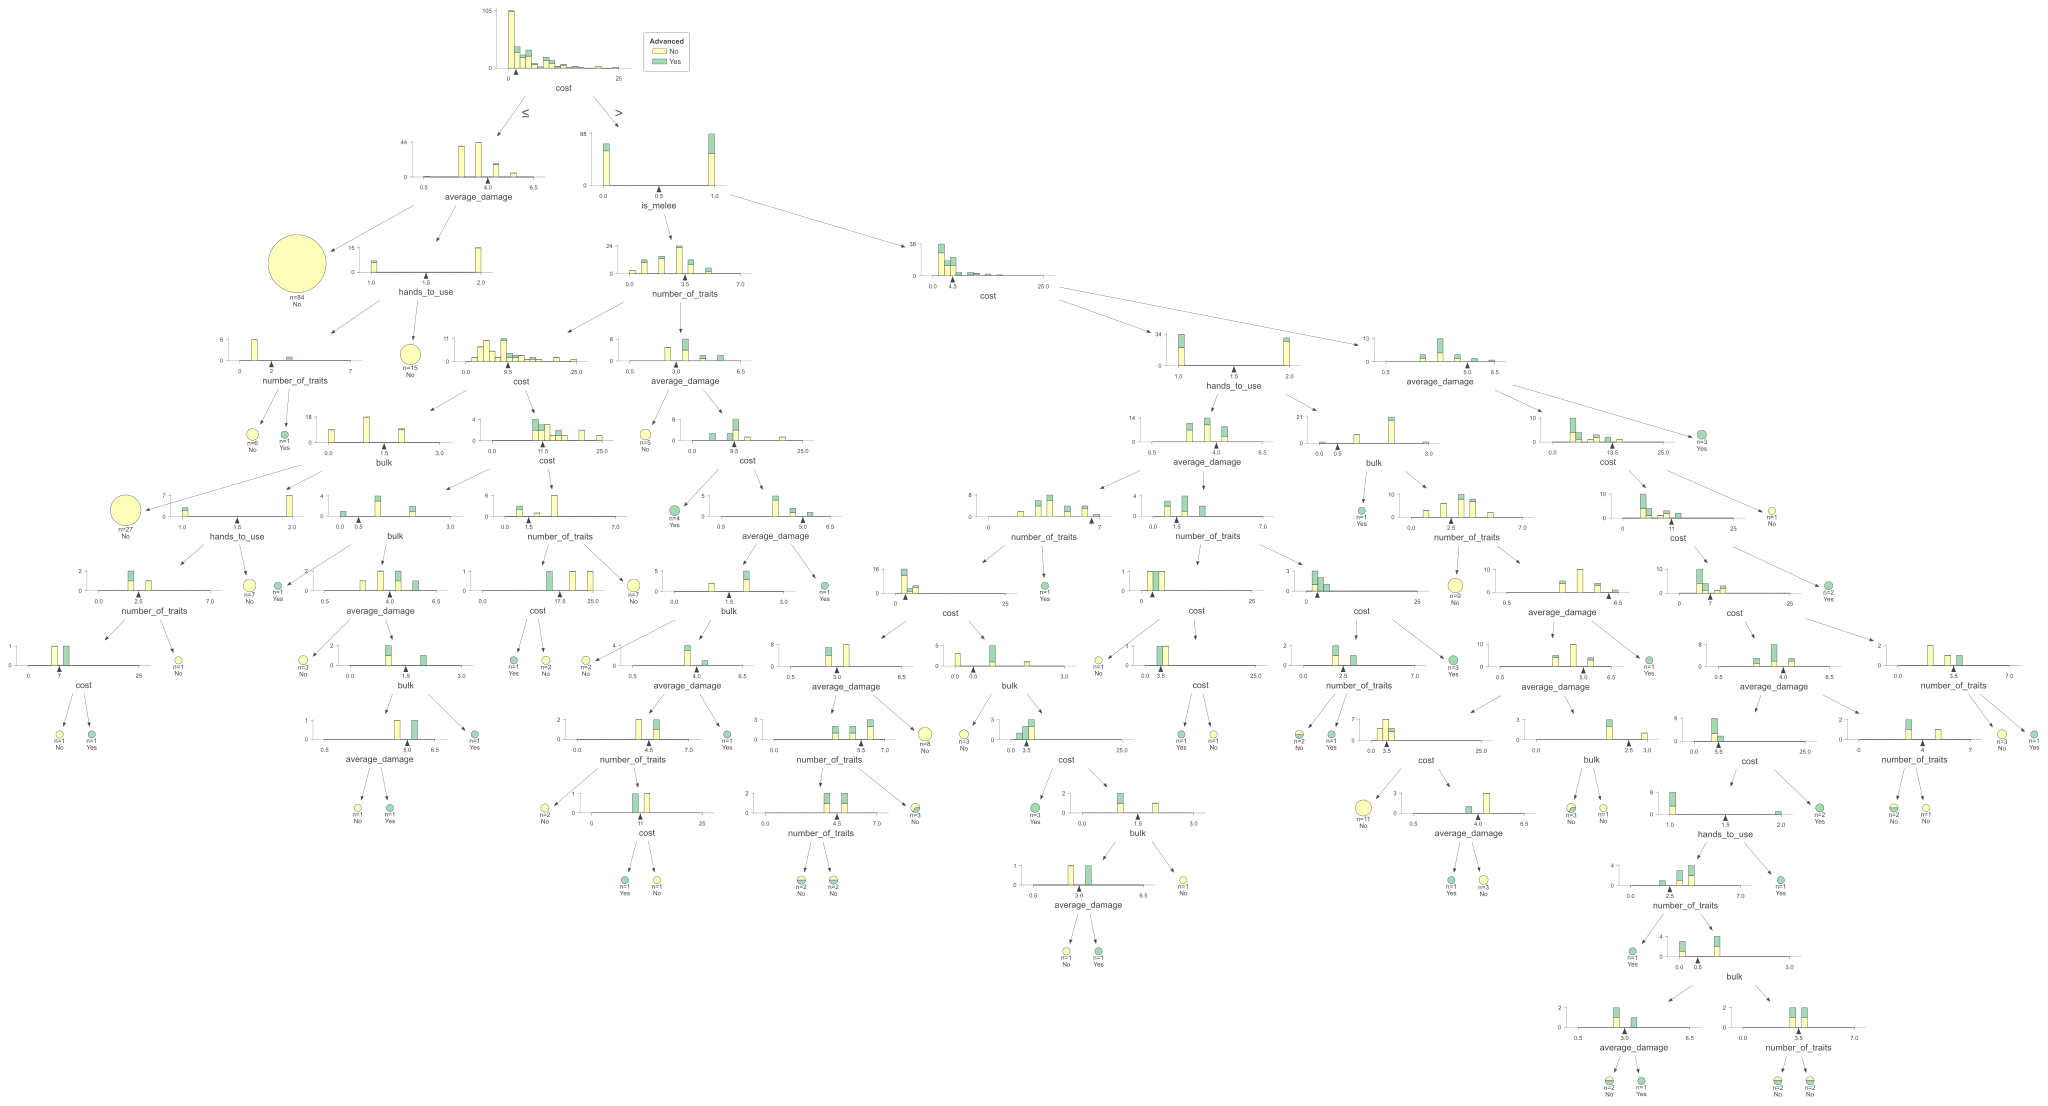

In [4]:
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Advanced',
                           class_names=["No", "Yes"])

viz_model.view(scale=1)

In [ ]:
# uhm, yea after a certain point these get really complex...

0